In [9]:
"""
NEURON simulation of a one-dimensional network of excitatory and inhibitory neurons
with spike-timing-dependent plasticity (STDP) to study self-organization
under different noise conditions.

Network Structure:
- 100 Excitatory (E) neurons: Two compartments (soma, dendrite).
- 25 Inhibitory (I) neurons: Single compartment (SST-like).
- 100 Poisson input sources projecting to E-neuron dendrites.

Connections:
1.  Input -> E (dendrite): Spatially tuned, Bell-shaped weights. Hebbian STDP.
2.  E -> I (soma): Excitatory, plastic with Hebbian STDP.
3.  I -> E (distal dendrite): Inhibitory feedback. Symmetric STDP with baseline depression.
4.  Noise 1 -> E (soma): Poisson noise source.
5.  Noise 2 -> E (distal dendrite): Poisson noise source.

The script sets up the network, runs the simulation, and records spike data.
"""

from neuron import n, gui, h
from neuron.units import ms, mV, µm
import mycells_ntwk
import random, os
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams
%matplotlib inline

# --- 0. i/o ---
plotdir = "/Users/bs3667/NYU Langone Health Dropbox/Shen Bo/Bo Shen Working files/STDP_Project0/Revision2/NEURON"

# --- 1. Simulation Parameters ---
n.load_file("stdrun.hoc")
random.seed(42)
np.random.seed(42)
SIM_DURATION = 2000 * ms

# --- 2. Network Parameters ---
N_E = 100  # Number of excitatory neurons
N_I = 25   # Number of inhibitory neurons
N_INPUT = 100 # Number of external input sources
SPACE_EXTENT_X = 300 * µm # extent over x-axis
SPACE_EXTENT_Y = 40 * µm # extent over y-axis
gbar_AMPA = 1.4e-3 # µS -> 1.4 nS, maximum conductance of a single point AMPA receptor
gbar_GABA = 3.5e-3 # µS -> 3.5 nS, maximum conductance of a single point GABA receptor
Delay_EtoE = 1.7 * ms # synaptic delay from E to E
Delay_EtoI = 1.3 * ms # synaptic delay from E to I
CnnctProb_InputtoE = .5 # the maximum connection probability from input fibers to E

# Test a network consisting of 100 E and 25 I
__Set up the network with one pair of E and I cells__

The E cell has one soma and two dendrites

The I cell is simplified as one soma body

In [2]:
E_SST = mycells_ntwk.Belt(NE=100, NI=25, SPACE_EXTENT_X = 300, SPACE_EXTENT_Y = 10, Itype = "SST")
# E_PV = mycells_ntwk.Belt(NE=100, NI=25, SPACE_EXTENT_X = -300, SPACE_EXTENT_Y = 10, Itype = "PV")

shape_window = n.PlotShape(True)
shape_window.show(0)
# n.topology()

1

__Feed the network with 100 input source of Poisson__

In [8]:
vs = n.VecStim()

AttributeError: '_NEURON_INTERFACE' object has no attribute 'VecStim'

In [4]:
Nsource = 100
Stim = []
init_weight = 0.5
for i in range(Nsource):
    si = n.NetStim()
    si.number = 1e9 # effectively infinit spikes
    si.interval = 30 # ms, average interval -> 50 Hz
    si.noise = True # Poisson process
    si.start = 5
    Stim.append(si)
    for target in E_SST.Ecells:
        if random.random() < CnnctProb_InputtoE:
            nc = n.NetCon(si, target.AMPA_dend)
            nc.delay = 0
            nc.weight[0] = gbar_AMPA * init_weight * random.random()
            target._ncs.append(nc)
    for target in E_SST.Icells:
        if random.random() < CnnctProb_InputtoE:
            nc = n.NetCon(si, target.AMPA)
            nc.delay = 0
            nc.weight[0] = gbar_AMPA * init_weight * random.random()
            target._ncs.append(nc)
del nc

In [5]:
print(", ".join(f"{item.weight[0]:.4f}" for item in E_SST.Ecells[1]._ncs))
print(", ".join(f"{item.weight[0]:.4f}" for item in E_SST.Icells[1]._ncs))


0.0006, 0.0008, 0.0006, 0.0016, 0.0014, 0.0010, 0.0017, 0.0007, 0.0014, 0.0010, 0.0008, 0.0010, 0.0002, 0.0004, 0.0006, 0.0005, 0.0002, 0.0003, 0.0007, 0.0003, 0.0003, 0.0002, 0.0003, 0.0003, 0.0005, 0.0004, 0.0001, 0.0004, 0.0006, 0.0003, 0.0001, 0.0005, 0.0002, 0.0005, 0.0002, 0.0006, 0.0001, 0.0001, 0.0006, 0.0004, 0.0005, 0.0007, 0.0003, 0.0006, 0.0003, 0.0004, 0.0000, 0.0003, 0.0003, 0.0005, 0.0003, 0.0000, 0.0003, 0.0006, 0.0002, 0.0003, 0.0006, 0.0001
0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0002, 0.0007, 0.0001, 0.0004, 0.0006, 0.0007, 0.0001, 0.0005, 0.0006, 0.0001, 0.0000, 0.0003, 0.0007, 0.0002, 0.0002, 0.0003, 0

In [6]:
nts = []
for i in range(Nsource):
    ncout = n.NetCon(Stim[i], None)
    nt = n.Vector()
    ncout.record(nt)
    nts.append(nt)

t = n.Vector().record(n._ref_t)

In [7]:
n.finitialize(-65 * mV)
n.continuerun(SIM_DURATION)

0.0

In [8]:
def calculate_binned_mean_firing_rate(neurons, window_size, total_duration):
    """
    Calculates the mean firing rate of a population of neurons in discrete time bins.

    Args:
        neurons (list): List of neuron objects, each with a 'spike_times' attribute.
        window_size (float): The size of the time bin (window) in ms.
        total_duration (float): The total simulation duration in ms.

    Returns:
        tuple: A tuple containing two numpy arrays:
               - time_bins (np.array): The center time of each bin.
               - firing_rates (np.array): The calculated mean firing rate in Hz for each bin.
    """
    all_spikes = []
    for neuron in neurons:
        all_spikes.extend(list(neuron.spike_times))
    
    if not all_spikes:
        return np.array([]), np.array([])

    all_spikes = np.sort(all_spikes)

    # Define the time bins
    bin_edges = np.arange(0, total_duration + window_size, window_size)
    time_bins = bin_edges[:-1] + window_size / 2.0

    # Calculate spike counts in each bin
    spike_counts, _ = np.histogram(all_spikes, bins=bin_edges)

    # Convert spike counts to firing rate in Hz
    num_neurons = len(neurons)
    # Rate = (spikes / num_neurons) / (window_duration_in_seconds)
    firing_rates = (spike_counts / num_neurons) / (window_size / 1000.0)

    return time_bins, firing_rates

In [9]:
# Calculate and print the running mean firing rate for E-neurons
window_size = 100 # ms
"""
step_size = 5    # ms
time_points, e_firing_rates = calculate_sliding_window_firing_rate(
    Ntwk.Ecells, window_size, step_size, SIM_DURATION)
i_time_points, i_firing_rates = calculate_sliding_window_firing_rate(
    Ntwk.Icells, window_size, step_size, SIM_DURATION)
"""

time_points, e_firing_rates = calculate_binned_mean_firing_rate(
    E_SST.Ecells, window_size, SIM_DURATION)
i_time_points, i_firing_rates = calculate_binned_mean_firing_rate(
    E_SST.Icells, window_size, SIM_DURATION)
print(f"\nMean Firing Rate of E-Neurons (window={window_size}ms):")
for t, rate in zip(time_points, e_firing_rates):
    print(f"  Time: {t:5.1f} ms, Rate: {rate:6.2f} Hz")
print(f"\nMean Firing Rate of I-Neurons (window={window_size}ms):")
for t, rate in zip(i_time_points, i_firing_rates):
    print(f"  Time: {t:5.1f} ms, Rate: {rate:6.2f} Hz")
    


Mean Firing Rate of E-Neurons (window=100ms):
  Time:  50.0 ms, Rate:   0.80 Hz
  Time: 150.0 ms, Rate:   0.30 Hz
  Time: 250.0 ms, Rate:   0.30 Hz
  Time: 350.0 ms, Rate:   0.00 Hz
  Time: 450.0 ms, Rate:   0.30 Hz
  Time: 550.0 ms, Rate:   0.00 Hz
  Time: 650.0 ms, Rate:   0.10 Hz
  Time: 750.0 ms, Rate:   0.00 Hz
  Time: 850.0 ms, Rate:   0.50 Hz
  Time: 950.0 ms, Rate:   0.60 Hz
  Time: 1050.0 ms, Rate:   0.40 Hz
  Time: 1150.0 ms, Rate:   0.60 Hz
  Time: 1250.0 ms, Rate:   0.10 Hz
  Time: 1350.0 ms, Rate:   0.40 Hz
  Time: 1450.0 ms, Rate:   0.70 Hz
  Time: 1550.0 ms, Rate:   0.60 Hz
  Time: 1650.0 ms, Rate:   0.00 Hz
  Time: 1750.0 ms, Rate:   0.30 Hz
  Time: 1850.0 ms, Rate:   0.20 Hz
  Time: 1950.0 ms, Rate:   0.30 Hz

Mean Firing Rate of I-Neurons (window=100ms):
  Time:  50.0 ms, Rate:  84.00 Hz
  Time: 150.0 ms, Rate:  78.40 Hz
  Time: 250.0 ms, Rate:  80.40 Hz
  Time: 350.0 ms, Rate:  85.20 Hz
  Time: 450.0 ms, Rate:  78.00 Hz
  Time: 550.0 ms, Rate:  79.20 Hz
  Time: 650.

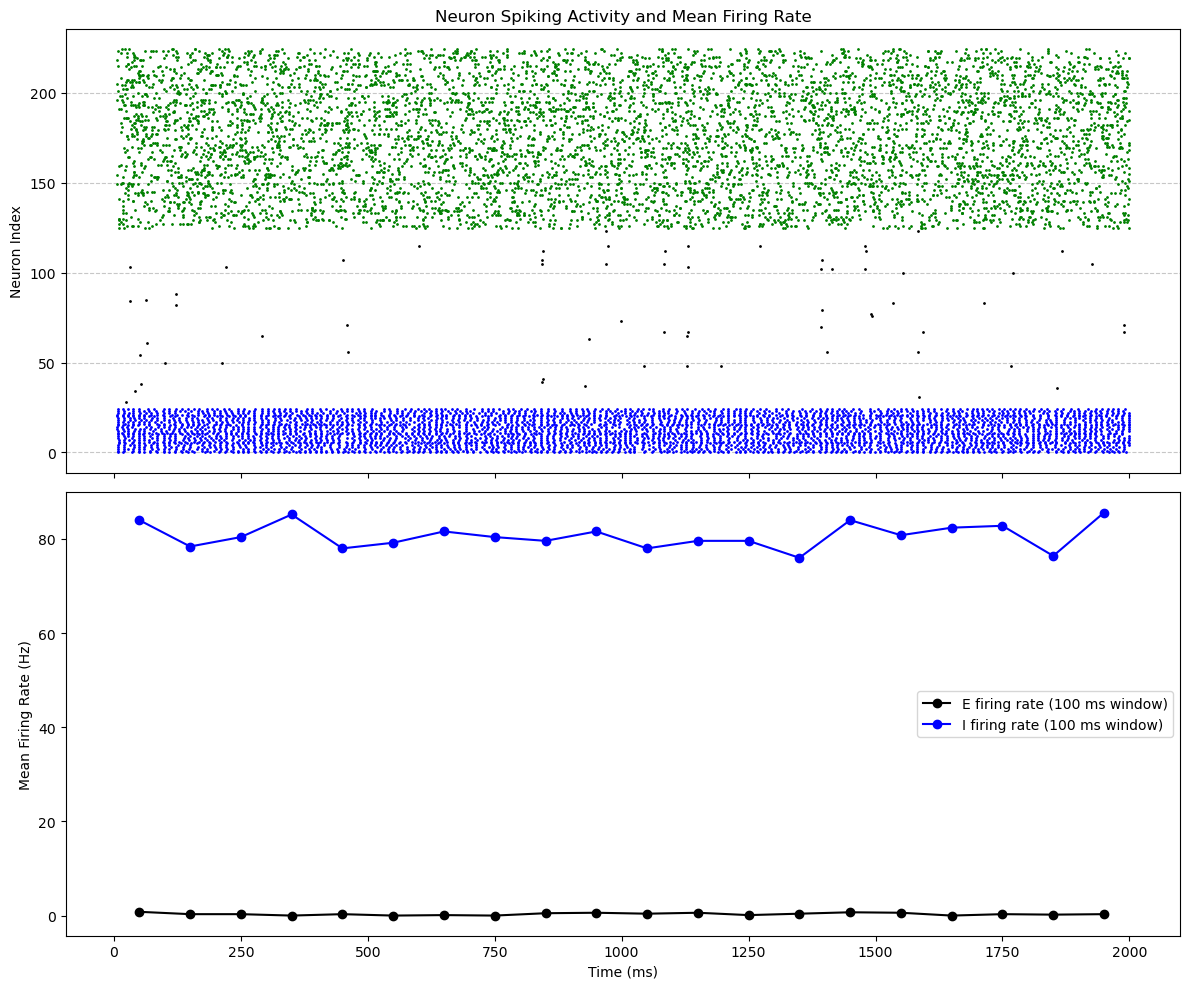

In [10]:
# --- 11. Plotting ---
# NOTE: You may need to install matplotlib: pip install matplotlib
fig, axes = plt.subplots(2, 1, figsize=(12, 10), sharex=True)

# a) Raster plot of E-neuron spikes
for i, neuron in enumerate(E_SST.Icells):
    axes[0].plot(list(neuron.spike_times), [i] * len(neuron.spike_times), 'b.', markersize=2)
for i, neuron in enumerate(E_SST.Ecells):
    axes[0].plot(list(neuron.spike_times), [i+N_I] * len(neuron.spike_times), 'k.', markersize=2)
for i in range(Nsource):
    axes[0].plot(nts[i], [i+Nsource+N_I] * len(nts[i]), 'g.', markersize=2)


axes[0].set_ylabel('Neuron Index')
axes[0].set_title('Neuron Spiking Activity and Mean Firing Rate')
axes[0].grid(axis='y', linestyle='--', alpha=0.7)

# b) Mean firing rate plot
axes[1].plot(time_points, e_firing_rates, 'k-o', label=f'E firing rate ({window_size} ms window)')
axes[1].plot(i_time_points, i_firing_rates, 'b-o', label=f'I firing rate ({window_size} ms window)')
axes[1].set_xlabel('Time (ms)')
axes[1].set_ylabel('Mean Firing Rate (Hz)')
axes[1].legend()
axes[1].grid(False)

plt.tight_layout()
plt.show()
fig.savefig(os.path.join(plotdir,"FxdNtwk_ESST_FF_Raster&FR_w2.pdf"), format='pdf')

__Inhibitory control of different sources of excitation on the E cell - Feedforword Inhibition__

In [ ]:
# Membrane potentials of example neurons
rcParams['pdf.fonttype'] = 42
rcParams['font.family'] = 'Arial'
fig = plt.figure(figsize=(8, 4))
ax1 = fig.add_subplot(2, 1, 1)
ax1.plot(t, list(Ntwk.Ecells[0].soma_v), label="E[0] - soma")
ax1.plot(t, list(Ntwk.Icells[0].soma_v), label="I[0] - soma")
ax1.plot(t, list(Ntwk.Ecells[1].soma_v), label="E[1] - soma")
ax1.plot(t, list(Ntwk.Icells[1].soma_v), label="I[1] - soma")
ax1.legend()
ax1.set_ylabel("Membrane potential (mV)")
# ax1.set_xticks([])  # Use ax2's tick labels

# raster plot
ax2 = fig.add_subplot(2, 1, 2)
for i, cell in enumerate(Ntwk.Ecells):
    ax2.vlines(list(cell.spike_times), i + 0.5, i + 1.5, colors='black')
for i, cell in enumerate(Ntwk.Icells):
    ax2.vlines(list(cell.spike_times), i*4 + 0.5, i*4 + 1.5, colors='red')
ax2.vlines(list(nt), -5, 0, color='purple')
ax2.set_ylabel("# Neurons")
ax2.set_xlabel("Time (ms)")
plt.show()
fig.savefig(os.path.join(plotdir,"Test_SingleInputSource.pdf"), format='pdf')

In [ ]:
try:
    del stimI
    del stimE
    del mycell
    del stim
except NameError:
    print("No action required")

In [14]:
# --- 9. Firing Rate Calculation Function ---
def calculate_sliding_window_firing_rate(neurons, window_size, step_size, total_duration):
    """
    Calculates the mean firing rate of a population of neurons using a sliding window.

    Args:
        neurons (list): List of neuron objects, each with a 'spike_times' attribute.
        window_size (float): The size of the sliding window in ms.
        step_size (float): The step size for moving the window in ms.
        total_duration (float): The total simulation duration in ms.

    Returns:
        tuple: A tuple containing two numpy arrays:
               - time_points (np.array): The center time of each window.
               - firing_rates (np.array): The calculated mean firing rate in Hz for each window.
    """
    all_spikes = []
    for neuron in neurons:
        all_spikes.extend(list(neuron.spike_times))
    
    if not all_spikes:
        return np.array([]), np.array([])

    all_spikes = np.sort(all_spikes)
    num_neurons = len(neurons)
    
    start_times = np.arange(0, total_duration - window_size + step_size, step_size)
    time_points = start_times + window_size / 2.0
    
    firing_rates = []
    
    for start_t in start_times:
        end_t = start_t + window_size
        # Find spikes within the window [start_t, end_t) using efficient search
        start_index = np.searchsorted(all_spikes, start_t, side='left')
        end_index = np.searchsorted(all_spikes, end_t, side='right')
        
        spike_count = end_index - start_index
        
        # Calculate rate in Hz
        # Rate = (total_spikes / num_neurons) / (window_duration_in_seconds)
        rate = (spike_count / num_neurons) / (window_size / 1000.0)
        firing_rates.append(rate)

    return time_points, np.array(firing_rates)

In [ ]:
# --- 6. Input and Noise Sources ---
print("Setting up input and noise sources...")
# Poisson-distributed spiking inputs
input_sources = []
input_spikes = []
for i in range(N_INPUT):
    source = n.NetStim()
    source.interval = 20 # Average interval 20 ms -> 50 Hz
    source.number = 1e9 # Effectively infinite spikes
    source.noise = 1 # Poisson process
    source.start = 5
    input_sources.append(source)
    # Record spike times for potential analysis
    spike_vec = n.Vector()
    nc = n.NetCon(source, None)
    nc.record(spike_vec)
    input_spikes.append(spike_vec)

# Noise sources
noise_soma = n.NetStim()
noise_soma.interval = 10 # 100 Hz noise
noise_soma.number = 1e9
noise_soma.noise = 1
noise_soma.start = 5

noise_dend = n.NetStim()
noise_dend.interval = 10 # 100 Hz noise
noise_dend.number = 1e9
noise_dend.noise = 1
noise_dend.start = 5

In [ ]:
# --- 7. Receiving Input and noise ---
print("Building synaptic connections...")
connections = {'input_e': [], 'e_i': [], 'i_e': [], 'noise_soma': [], 'noise_dend': []}

# a) Input -> E neurons (spatially tuned)
tuning_width = 10 # um, width of the Bell-shaped tuning curve
max_weight_input = 0.02
for i, src in enumerate(input_sources):
    # Each input source is centered on one E neuron's location
    center_x = e_neurons[i].x
    for j, e_neuron in enumerate(e_neurons):
        dist = abs(e_neuron.x - center_x)
        weight = max_weight_input * np.exp(-(dist**2) / (2 * tuning_width**2))

        if weight > 1e-4: # Connect only if weight is significant
            syn = h.Exp2Syn(e_neuron.dend(0.5)) # Target proximal dendrite
            syn.tau1 = E_SYN_TAU1
            syn.tau2 = E_SYN_TAU2
            nc = h.NetCon(src, syn)
            nc.delay = 1 # ms
            nc.weight[0] = weight
            connections['input_e'].append(nc)